# Matplotlib: Plotting Subplots in a loop

In [1]:
# ! pip install matplotlib pandas ffn

In [9]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [10]:
import ffn  # library to get stock data

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [11]:
# load daily stock prices
tickers = ["AAPL", "MSFT", "TSLA", "NVDA", "INTC"]
prices = ffn.get(tickers, start="2017-01-01")

<IPython.core.display.Javascript object>

In [12]:
df = prices.melt(ignore_index=False, var_name="ticker", value_name="closing_price")
df.head()

,ticker,closing_price
Date,,
2017-01-03,aapl,27.413372
2017-01-04,aapl,27.382690
2017-01-05,aapl,27.521944
2017-01-06,aapl,27.828764
2017-01-09,aapl,28.083660


<IPython.core.display.Javascript object>

## Method 1: axs.ravel()

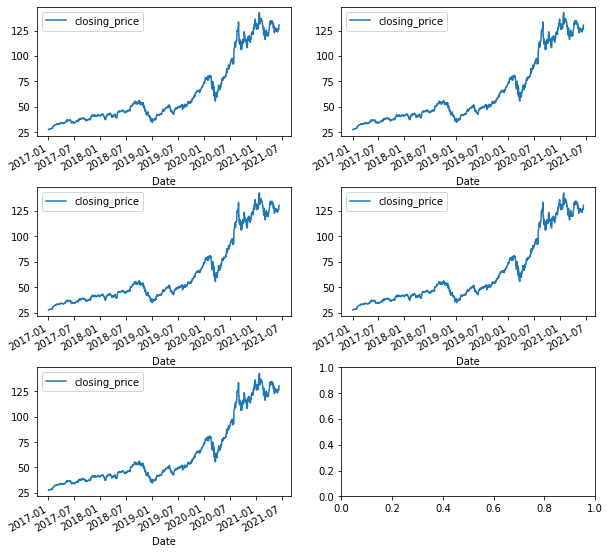

<IPython.core.display.Javascript object>

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)
for ticker, ax in zip(tickers, axs.ravel()):
    df[df["ticker"] == "aapl"].plot(ax=ax)
plt.show()

## Method 2: plt.subplot

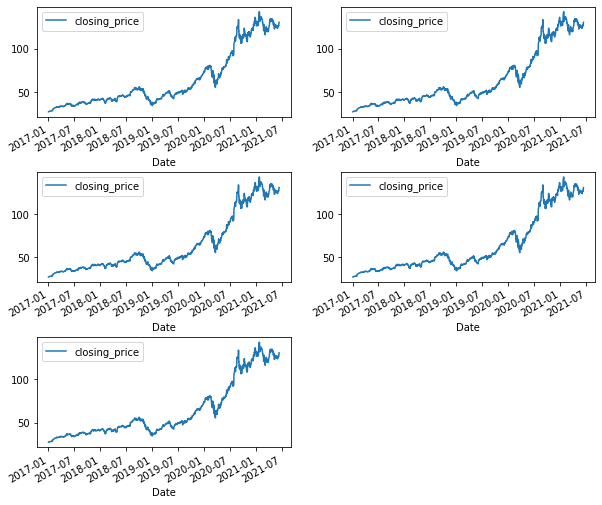

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(tickers)):
    ax = plt.subplot(3, 2, n + 1)
    df[df["ticker"] == "aapl"].plot(ax=ax)